# Laptop Price Predictor Using Regression

The laptop price predictor is a regression model that aims to predict the price of a laptop based on various features such as the laptop's brand, model, processor, graphics card, storage capacity, and other specifications. The model is built using a regression algorithm that analyzes the relationships between the laptop's features and its price, and then uses that information to make predictions about the price of new laptops. The end result is a tool that can help consumers make informed decisions about which laptops to purchase based on their budget and desired features.

## Step 1. Importing Essential Libraries

Libraries like numpy, pandas and matplotlib are important for the correct execution of the project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# This line of code reads a CSV file named "laptop_data.csv" using pandas 
# and loads its contents into a pandas dataframe called "df". 
df = pd.read_csv("laptop_data.csv")    

## Step 2. Analysing and Visualizing the Data (Data Preprocessing)
To create a better model for our data, understanding the data well is crucial. In this section we will understand as well as visualize our data to check correlations among various columns

In [3]:
# Now let's see the first 5 rows of the 'df' dataframe
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
# Let's understand out data better by seeing the summary of various columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
# Let's check if there are any duplicate rows in the dataframe
df.duplicated().sum()

0

In [6]:
# Let's check for any missing or null values in ur dataframe
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
# Here we don't need the column 'Unnamed'. Let's delete it.
df.drop(columns=["Unnamed: 0"], inplace=True)

In [8]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [9]:
# Let's remove the 'GB' part in Ram and 'kg' part in Weight as it will interfere with our training of model
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Weight'] = df['Weight'].str.replace('kg','')

In [10]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [11]:
# Let's rename the 'Ram' column to 'RAM'
df = df.rename(columns={'Ram': 'RAM'})

In [12]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,RAM,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [13]:
# Let's rename the 'ScreenResolution' column to 'Screen Resolution'
df = df.rename(columns={'ScreenResolution': 'Screen Resolution'})

In [14]:
# Let's rename the 'TypeName' column to 'Type Name'
df = df.rename(columns={'TypeName': 'Type Name'})

In [15]:
df.head()

,Company,Type Name,Inches,Screen Resolution,Cpu,RAM,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [16]:
# Let's convert the datatypes of two columns: 'RAM' and 'Weight'
# RAM datatype will now be int32
# Weight datatype will now be float32

df['RAM'] = df['RAM'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [17]:
df.head()

,Company,Type Name,Inches,Screen Resolution,Cpu,RAM,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1303 non-null   object 
 1   Type Name          1303 non-null   object 
 2   Inches             1303 non-null   float64
 3   Screen Resolution  1303 non-null   object 
 4   Cpu                1303 non-null   object 
 5   RAM                1303 non-null   int32  
 6   Memory             1303 non-null   object 
 7   Gpu                1303 non-null   object 
 8   OpSys              1303 non-null   object 
 9   Weight             1303 non-null   float32
 10  Price              1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [19]:
# Importing seaborn - it is used to create atractive and useful statistical graphics
import seaborn as sns

<Axes: xlabel='Price', ylabel='Count'>

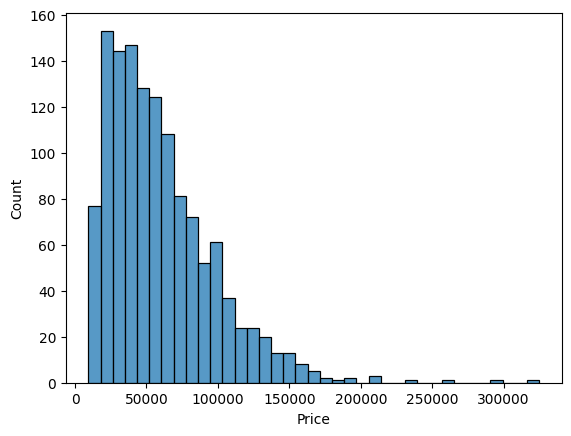

In [20]:
# Let's create a histogram of the distribution of the price variable
sns.histplot(df['Price'])

<Axes: xlabel='Company'>

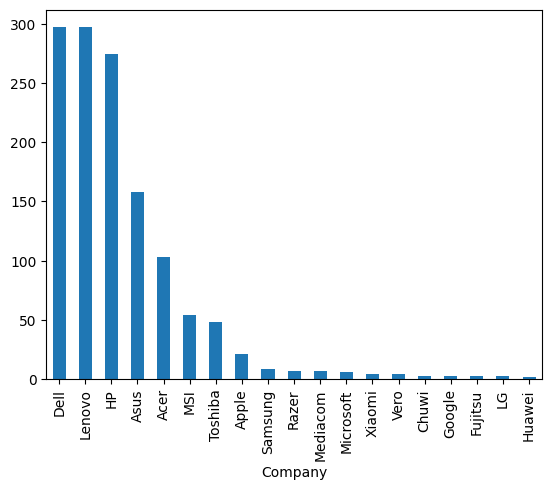

In [21]:
# Let's see the frequency of unique laptop brands in our database using a barplot
df['Company'].value_counts().plot(kind='bar')

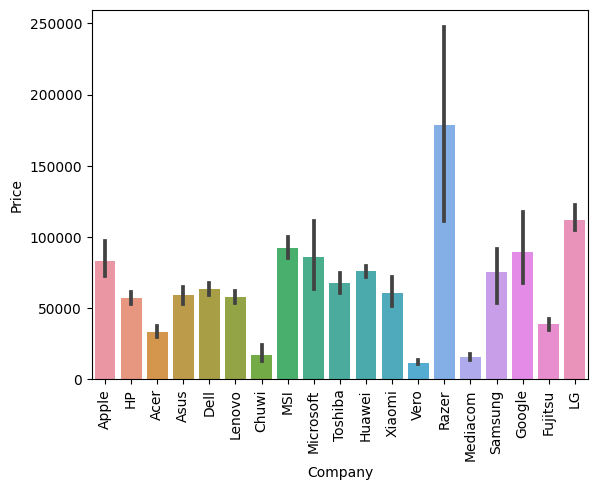

In [22]:
# Let's see the correlation of different laptop brands and price
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

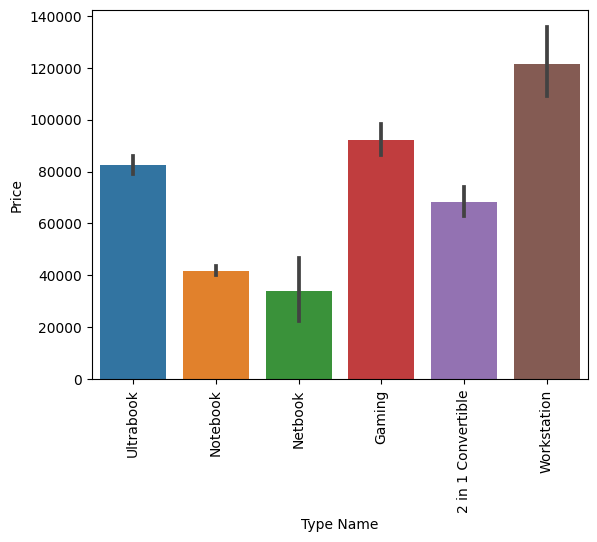

In [23]:
# Let's see the correlation of different laptop types and price
sns.barplot(x=df['Type Name'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

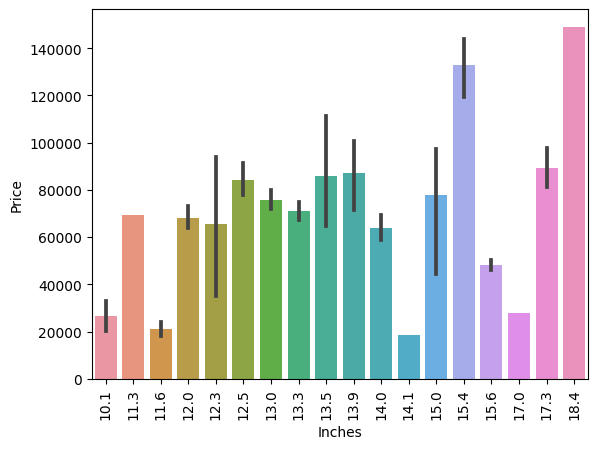

In [24]:
# Let's see the correlation of different laptop screen size(in inches) and price
sns.barplot(x=df['Inches'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [25]:
# Count of unique values in 'Screen Resolution' column
df['Screen Resolution'].value_counts()

Screen Resolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1

In [26]:
# Let's create a new column called 'Touchscreen' indicating whether a laptop has touchscreen display or not
df['Touchscreen'] = df['Screen Resolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [27]:
df.head()

,Company,Type Name,Inches,Screen Resolution,Cpu,RAM,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


<Axes: xlabel='Touchscreen'>

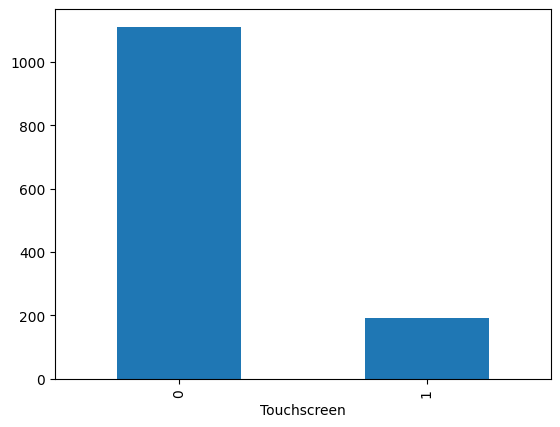

In [28]:
# Barplot of 'Touchscreen' column and their frequency
df['Touchscreen'].value_counts().plot(kind='bar')

In [29]:
df.head()

,Company,Type Name,Inches,Screen Resolution,Cpu,RAM,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [30]:
# Let's create a new column called 'IPS' indicating whether a laptop has IPS Panel or not
df['IPS'] = df['Screen Resolution'].apply(lambda x:1 if 'IPS Panel' in x else 0)

In [31]:
df.head()

,Company,Type Name,Inches,Screen Resolution,Cpu,RAM,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [32]:
df['IPS'].value_counts()

IPS
0    938
1    365
Name: count, dtype: int64

In [33]:
# Let's create a variable which splits the 'Screen Resolution' column with 'x' as delimiter
new = df['Screen Resolution'].str.split('x',n=1,expand=True)

In [34]:
new

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [35]:
# Let's create two new columns X_res and Y_res to store the x and y resolutions of the screen
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [36]:
df.head()

,Company,Type Name,Inches,Screen Resolution,Cpu,RAM,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [37]:
# Since X_res has unnecessary data let's remove that and only keep the X_res value
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])

In [38]:
df.head()

,Company,Type Name,Inches,Screen Resolution,Cpu,RAM,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [39]:
df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)')

0       [2560]
1       [1440]
2       [1920]
3       [2880]
4       [2560]
         ...  
1298    [1920]
1299    [3200]
1300    [1366]
1301    [1366]
1302    [1366]
Name: X_res, Length: 1303, dtype: object

In [40]:
# Convert X_res and Y_res datatype from sting to int
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1303 non-null   object 
 1   Type Name          1303 non-null   object 
 2   Inches             1303 non-null   float64
 3   Screen Resolution  1303 non-null   object 
 4   Cpu                1303 non-null   object 
 5   RAM                1303 non-null   int32  
 6   Memory             1303 non-null   object 
 7   Gpu                1303 non-null   object 
 8   OpSys              1303 non-null   object 
 9   Weight             1303 non-null   float32
 10  Price              1303 non-null   float64
 11  Touchscreen        1303 non-null   int64  
 12  IPS                1303 non-null   int64  
 13  X_res              1303 non-null   int32  
 14  Y_res              1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 1

In [42]:
# Let's see the correlation of price with different columns in the dataframe
df.corr(numeric_only=True)['Price']

Inches         0.068197
RAM            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [43]:
# Let's create a new column called PPI 
df['PPI'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [44]:
df.head()

,Company,Type Name,Inches,Screen Resolution,Cpu,RAM,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [45]:
df.corr(numeric_only=True)['Price']

Inches         0.068197
RAM            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
PPI            0.473487
Name: Price, dtype: float64

In [46]:
# Since we no longer need Screen Resolution, Inches, X_res and Y_res; let's delete those rows
df.drop(columns=['Screen Resolution','Inches', 'X_res', 'Y_res'], inplace=True)

In [47]:
df.head()

,Company,Type Name,Cpu,RAM,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


<Axes: xlabel='Cpu'>

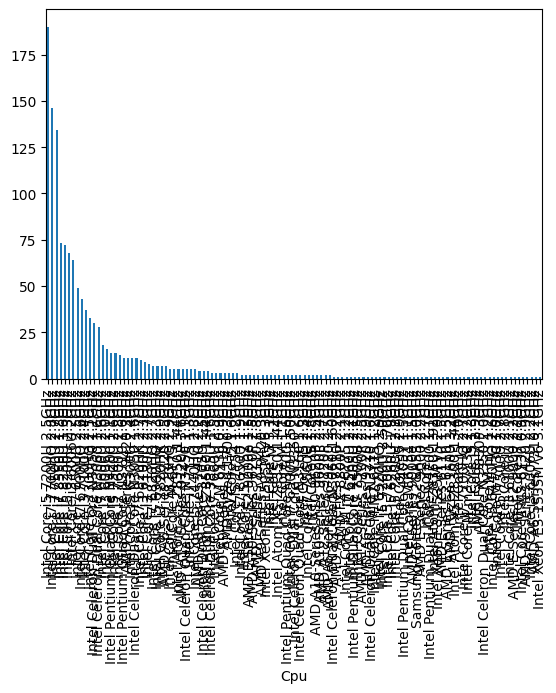

In [48]:
df['Cpu'].value_counts().plot(kind='bar')

In [49]:
# Let's split the data in Cpu column into words
df['Cpu'].apply(lambda x: x.split())

0                         [Intel, Core, i5, 2.3GHz]
1                         [Intel, Core, i5, 1.8GHz]
2                  [Intel, Core, i5, 7200U, 2.5GHz]
3                         [Intel, Core, i7, 2.7GHz]
4                         [Intel, Core, i5, 3.1GHz]
                           ...                     
1298               [Intel, Core, i7, 6500U, 2.5GHz]
1299               [Intel, Core, i7, 6500U, 2.5GHz]
1300    [Intel, Celeron, Dual, Core, N3050, 1.6GHz]
1301               [Intel, Core, i7, 6500U, 2.5GHz]
1302    [Intel, Celeron, Dual, Core, N3050, 1.6GHz]
Name: Cpu, Length: 1303, dtype: object

In [50]:
# Let's create a new column CPU Name whoch stores only the first three words of the Cpu column
df['CPU Name'] = df['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))

In [51]:
df.head()

,Company,Type Name,Cpu,RAM,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [52]:
# This function takes a Cpu name as input ans returns the CPU Brand of it

def fetch_processor(text):
    if text == 'Intel Core i3' or text == 'Intel Core i5' or text == 'Intel Core i7':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
            

In [53]:
# Let's create CPU Brand column using the above function
df['CPU Brand'] = df['CPU Name'].apply(fetch_processor)

In [54]:
df.head()

,Company,Type Name,Cpu,RAM,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Name,CPU Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


In [55]:
df['CPU Brand'].value_counts()

CPU Brand
Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: count, dtype: int64

<Axes: xlabel='CPU Brand'>

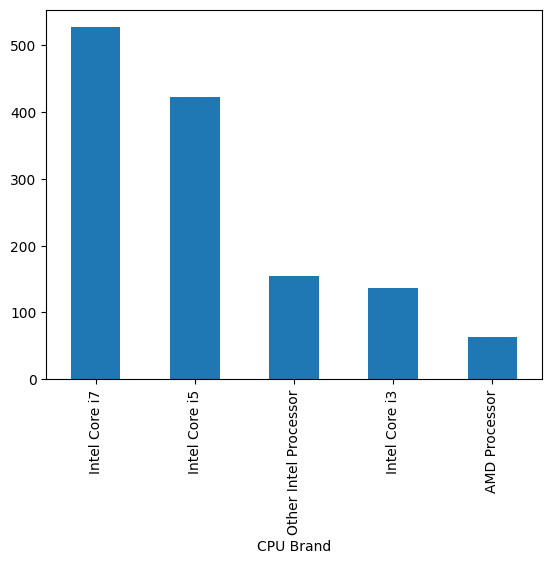

In [56]:
df['CPU Brand'].value_counts().plot(kind='bar')

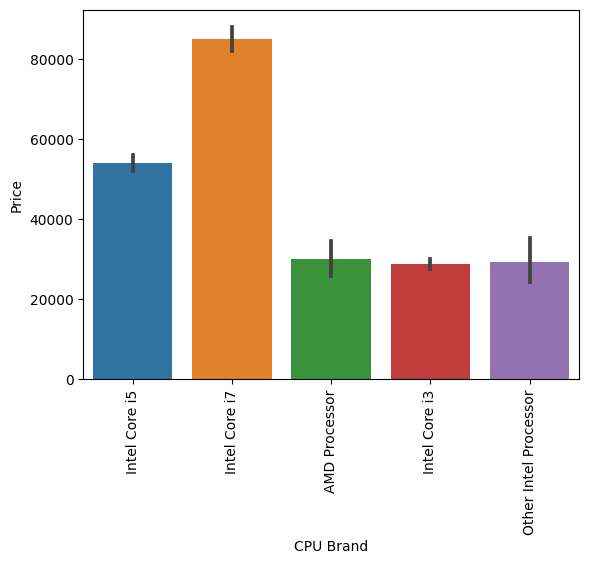

In [57]:
sns.barplot(x=df['CPU Brand'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [58]:
df.drop(['Cpu', 'CPU Name'], inplace=True, axis=1)

In [59]:
df.head()

,Company,Type Name,RAM,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<Axes: xlabel='RAM'>

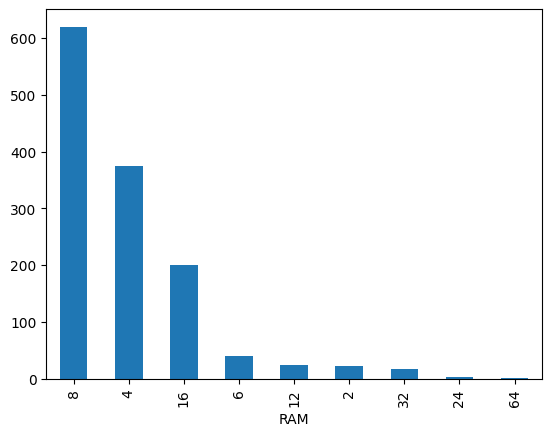

In [60]:
df['RAM'].value_counts().plot(kind='bar')

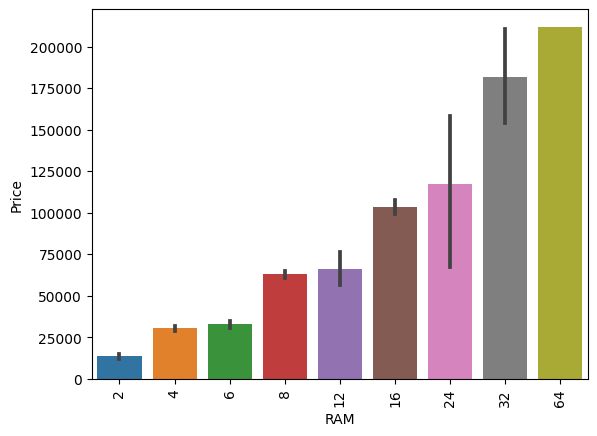

In [61]:
sns.barplot(x=df['RAM'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [62]:
df.head()

,Company,Type Name,RAM,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [63]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [64]:
print(df.columns)

Index(['Company', 'Type Name', 'RAM', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price', 'Touchscreen', 'IPS', 'PPI', 'CPU Brand'],
      dtype='object')


In [65]:
# In the following code we are doing the following:
# We are creating 4 different columns called HDD, SSD, Hybrid and Flash_Storage
# Based on the values in Memory column, we are filling the corresponding values in the four columns
# For example: Memory: 128GB SSD + 1TB HDD --> HDD = 1024, SSD = 128, Hybrid = 0, Flahs_Storage=0

df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.extract('(\d+)')  # Extract numeric part from the string

df["second"].fillna("0", inplace=True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.extract('(\d+)')  # Extract numeric part from the string

df["first"] = df["first"].astype(int)  # Change to float to handle possible decimals
df["second"] = df["second"].astype(int)

df["HDD"] = (df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"])
df["SSD"] = (df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"])
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first"] * df["Layer1Flash_Storage"] + df["second"] * df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'], inplace=True)


In [66]:
df.head()

,Company,Type Name,RAM,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [67]:
# Since we no longer need the Memory column we will simply drop(or delete) it
df.drop(columns=['Memory'], inplace=True)

In [68]:
df.head()

,Company,Type Name,RAM,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [69]:
df.corr(numeric_only=True)['Price']

RAM              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [70]:
# Since Flash_Storage and Hybrid have very weak correlation with Price(our target vairable), it is safe
#to drop these columns

df.drop(columns=['Flash_Storage', 'Hybrid'], inplace=True)

In [71]:
df.head()

,Company,Type Name,RAM,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


<Axes: xlabel='Gpu'>

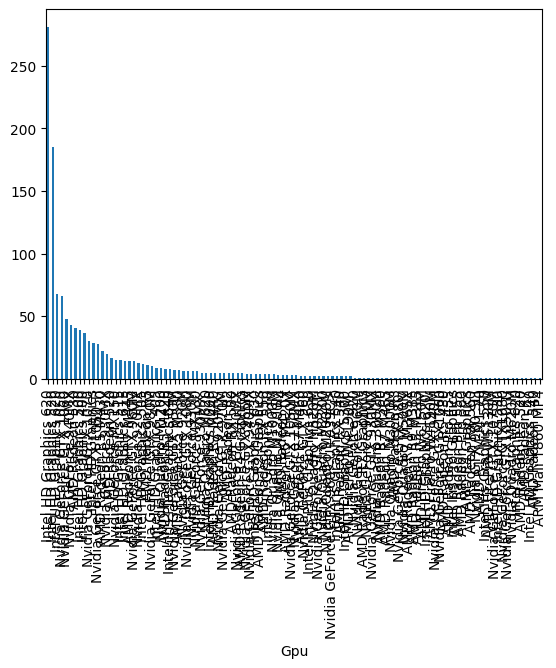

In [72]:
df['Gpu'].value_counts().plot(kind='bar')

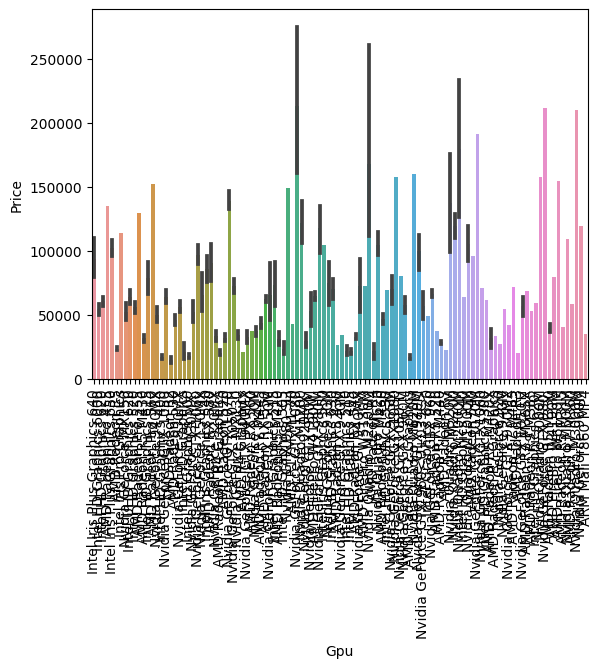

In [73]:
sns.barplot(x=df['Gpu'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [74]:
# Let's create a new column GPU Brand which takes the first word of column Gpu and stores it
df['GPU Brand'] = df['Gpu'].apply(lambda x : x.split()[0])

In [75]:
df.head()

,Company,Type Name,RAM,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Brand,HDD,SSD,GPU Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [76]:
df['GPU Brand'].value_counts()

GPU Brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

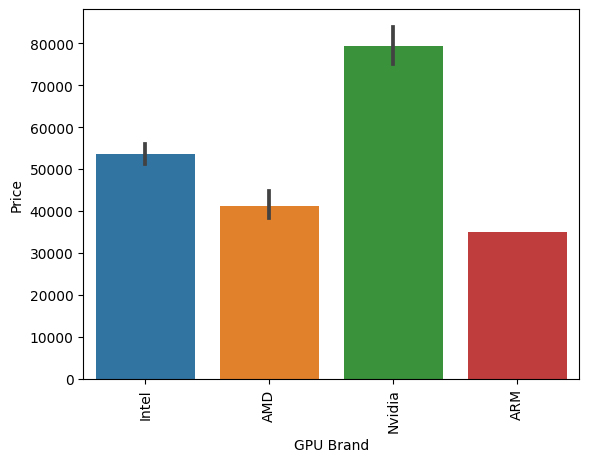

In [77]:
sns.barplot(x=df['GPU Brand'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [78]:
df = df[df['GPU Brand'] != 'ARM']

In [79]:
df['GPU Brand'].value_counts()

GPU Brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

In [80]:
# Let's drop Gpu column
df.drop(columns=['Gpu'], inplace=True)

In [81]:
df.head()

,Company,Type Name,RAM,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Brand,HDD,SSD,GPU Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [82]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [83]:
# The below function takes a oeprating system as parameter and returns whether the OS is Windows,
# Mac or Other

def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [84]:
# Let's create a new column OS using the above function
df['OS'] = df['OpSys'].apply(cat_os)

In [85]:
df.head()

,Company,Type Name,RAM,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Brand,HDD,SSD,GPU Brand,OS
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [86]:
df['OS'].value_counts()

OS
Windows               1125
Others/No OS/Linux     156
Mac                     21
Name: count, dtype: int64

In [87]:
# Let's drop OpSys column
df.drop(columns=['OpSys'], inplace=True)

In [88]:
df.head()

,Company,Type Name,RAM,Weight,Price,Touchscreen,IPS,PPI,CPU Brand,HDD,SSD,GPU Brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


C:\Users\hp\AppData\Local\Temp\ipykernel_9480\3410914685.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

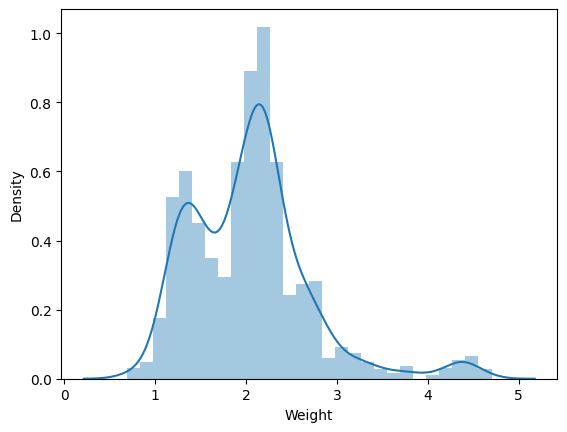

In [89]:
# Let's visualize the frequencies of different weights with a distplot
sns.distplot(df['Weight'])

In [90]:
df.corr(numeric_only=True)

,RAM,Weight,Price,Touchscreen,IPS,PPI,HDD,SSD
RAM,1.000000,0.383362,0.742905,0.118875,0.207949,0.305688,0.095808,0.603379
Weight,0.383362,1.000000,0.209867,-0.293004,0.018643,-0.321883,0.514147,-0.063818
Price,0.742905,0.209867,1.000000,0.192917,0.253320,0.475368,-0.096891,0.670660
Touchscreen,0.118875,-0.293004,0.192917,1.000000,0.148026,0.458571,-0.208766,0.257577
IPS,0.207949,0.018643,0.253320,0.148026,1.000000,0.299142,-0.093588,0.225311
PPI,0.305688,-0.321883,0.475368,0.458571,0.299142,1.000000,-0.294698,0.509437
HDD,0.095808,0.514147,-0.096891,-0.208766,-0.093588,-0.294698,1.000000,-0.400750
SSD,0.603379,-0.063818,0.670660,0.257577,0.225311,0.509437,-0.400750,1.000000


<Axes: >

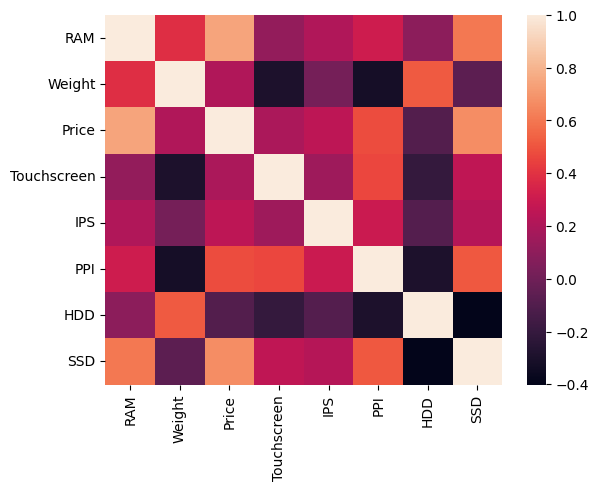

In [91]:
# Let's visualize correlation of different columns with each other using a heatmap
sns.heatmap(df.corr(numeric_only=True))

C:\Users\hp\AppData\Local\Temp\ipykernel_9480\2353505263.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

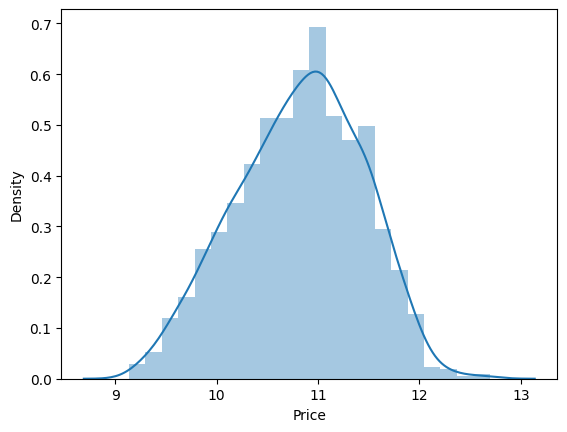

In [92]:
# While using our model we will use logarithm of our price since it is less skewed and 
# more convenient to work with
sns.distplot(np.log(df['Price']))

## Step 3. Training the Model
It's finally time to train the model. Here is where all the fun begins!
We will first declare our dependent variales and independent variables and then perform regression on the same.

In [93]:
# Let's now seperate the independent variables(features) and the dependent variable(target)
# X --> features
# y --> target

X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [94]:
X

,Company,Type Name,RAM,Weight,Touchscreen,IPS,PPI,CPU Brand,HDD,SSD,GPU Brand,OS
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [95]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [96]:
# Let's split the data into X_train, X_test, y_train and y_test
# We will use X_train and y_train to train the model and X_test and y_test to test the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

In [97]:
X_train

,Company,Type Name,RAM,Weight,Touchscreen,IPS,PPI,CPU Brand,HDD,SSD,GPU Brand,OS
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


## Step 4. Testing Different Models
In this section we will test the r2 score and mean absolute scores of different regression models.
Since there are so many different regression models available to us, choosing any one model becomes difficult. That's why we will train our data with different regresison models and check which model has the best accuracy and least error


In [98]:
# Importing essential libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [99]:
# Importing essential libraries to use different regression models
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

### 4.1 Linear Regression 
Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the variables and estimates the coefficients of the equation that best fits the data. The goal is to find the line of best fit that minimizes the sum of the squared errors between the predicted and actual values. 

In [100]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred) )

R2 score 0.8073277448418656
MAE 0.21017827976428838


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [101]:
np.exp(0.21)

1.2336780599567432

### 4.2 Ridge Regression
Ridge regression is a regularized form of linear regression that adds a penalty term to the sum of the squared errors, based on the magnitude of the coefficients. This penalty term helps to shrink the coefficients towards zero and reduces the risk of overfitting. Ridge regression is particularly useful when dealing with multicollinearity, a situation where the independent variables are highly correlated. By adding the penalty term, ridge regression can improve the stability and accuracy of the model.

In [102]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8127331031311809
MAE 0.20926802242582965


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### 4.4 K-Nearest Regression

K-Nearest Neighbors (KNN) regression is a non-parametric method used for regression tasks. KNN regression predicts the value of a new data point by finding the k-nearest training data points and taking the average of their target values. The number of nearest neighbors (k) is a hyperparameter that can be tuned to optimize the model's performance. KNN regression is easy to understand and implement and can capture complex nonlinear relationships between the independent and dependent variables. However, KNN regression can be sensitive to outliers, and the prediction time can be slow for large datasets.

In [103]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8027675291937718
MAE 0.193456293739003


### 4.5 Decision Tree Regression

Decision tree regression is a non-parametric method used for regression tasks. It builds a tree-like model of decisions and their possible consequences. Each internal node of the tree represents a decision based on one of the features, and each leaf node represents a prediction of the target value. Decision tree regression is easy to understand and interpret, and it can handle both numerical and categorical data. It is also able to capture complex nonlinear relationships between the independent and dependent variables. However, decision tree regression can be prone to overfitting, especially when the tree is deep, and the predictions can be sensitive to small changes in the data. Regularization techniques such as pruning can be used to address these issues.

In [104]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8338603295381403
MAE 0.18508098363391726


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### 4.6 Support Vector Regression

Support Vector Regression (SVR) is a popular method for regression tasks. It is based on the Support Vector Machine (SVM) algorithm and uses a similar approach to find the hyperplane that best separates the data into different classes. However, in SVR, the goal is to find a hyperplane that best fits the data while allowing some errors. SVR can handle non-linear relationships between the independent and dependent variables by using kernel functions to map the input space into a higher-dimensional space. SVR is effective in handling high-dimensional data and can also handle outliers and noise well. However, SVR can be sensitive to the choice of hyperparameters such as the kernel function and regularization parameter, and the training time can be long for large datasets.

In [105]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8083180902288665
MAE 0.2023905942724332


## Step 5. Exporting the Model

Now since we have trained our model with best regression algorithm, this model needs to be saved in a file, so that it can be used on the go, without having the re-train it again.
This can be done with a pyhton library called pickle.

In [106]:
# We will save two files: df.pkl and pipe.pkl
# df.pkl will contain the pandas dataframe(in binary format)
# pipe.pkl will contain the trained model(in binary format)

import pickle

pickle.dump(df, open('df.pkl', 'wb'))
pickle.dump(pipe, open('pipe.pkl', 'wb'))

## Step 6. Using streamlit to create the app
Now we will import the above two files in a Python IDE like Pycharm. Then we will write appropriate streamlit code and run it in the IDE. This will create a website for us which can then be used to predict prices of laptops.

In [107]:
# Note: This code is only for demonstration purpose only and should only be used in Python IDE like Pycharm.

import streamlit as st
import pickle
import numpy as np

# import the model
pipe = pickle.load(open('pipe.pkl', 'rb'))
df = pickle.load(open('df.pkl', 'rb'))

st.title("Laptop Predictor")

# brand
company = st.selectbox('Brand', df['Company'].unique())

# type of laptop
TYPE = st.selectbox('Type', df['Type Name'].unique())

# Ram
ram = st.selectbox('RAM(in GB)', [2, 4, 6, 8, 12, 16, 24, 32, 64])

# weight
weight = st.number_input('Weight of the Laptop')

# Touchscreen
touchscreen = st.selectbox('Touchscreen', ['No', 'Yes'])

# IPS
ips = st.selectbox('IPS', ['No', 'Yes'])

# screen size
screen_size = st.number_input('Screen Size')

# resolution
resolution = st.selectbox('Screen Resolution',
                          ['1920x1080', '1366x768', '1600x900', '3840x2160', '3200x1800', '2880x1800', '2560x1600',
                           '2560x1440', '2304x1440'])

# cpu
cpu = st.selectbox('CPU', df['CPU Brand'].unique())

hdd = st.selectbox('HDD(in GB)', [0, 128, 256, 512, 1024, 2048])

ssd = st.selectbox('SSD(in GB)', [0, 8, 128, 256, 512, 1024])

gpu = st.selectbox('GPU', df['GPU Brand'].unique())

os = st.selectbox('OS', df['OS'].unique())

if st.button('Predict Price'):
    # query
    ppi = None
    if touchscreen == 'Yes':
        touchscreen = 1
    else:
        touchscreen = 0

    if ips == 'Yes':
        ips = 1
    else:
        ips = 0

    X_res = int(resolution.split('x')[0])
    Y_res = int(resolution.split('x')[1])
    ppi = ((X_res ** 2) + (Y_res ** 2)) ** 0.5 / screen_size
    query = np.array([company, TYPE, ram, weight, touchscreen, ips, ppi, cpu, hdd, ssd, gpu, os])

    query = query.reshape(1, 12)
    st.title("The predicted price of this configuration is " + str(int(np.exp(pipe.predict(query)[0]))))
    
# After typing the above code, go to the Terminal and type:
#           streamlit run app.py
# here app.py is the name of the python file you are working on!


2024-01-13 13:50:10.044 
  command:

    streamlit run C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


## Thank You for Reading!
Thank you for taking the time to read my project on Jupyter Notebook. I hope you found it informative and engaging. Your interest and attention are greatly appreciated, and I hope that the knowledge you gained from this project will be valuable to you. Once again, thank you for your time, and I wish you all the best in your future endeavors.


If you have any queries contact me here: mepiyushkumarsoni@gmail.com